In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
actual_df = pd.read_csv('ex1data2.txt', header = None, sep = ',', names = ['size', 'bedroom', 'price'])

actual_df.head()

In [4]:
df = (actual_df - actual_df.mean()) / actual_df.std() # Feature Scaling

In [5]:
df.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [6]:
X = df.loc[:, ['size', 'bedroom']]

y = df.loc[:,'price']

y = y[:, np.newaxis]

m = y.size

ones = np.ones((m,1))

X = np.hstack((ones, X))

In [8]:
theta = np.zeros((X.shape[1],1))

In [9]:
theta

array([[0.],
       [0.],
       [0.]])

In [10]:
hypothesis = np.dot(X, theta) - y

In [11]:
def computecost(X, y, theta):
    cost = np.sum(np.power((np.dot(X, theta) - y), 2)) / (2 * m)
    return cost

In [12]:
cost = computecost(X, y, theta)

In [13]:
print(cost)

0.4893617021276595


In [14]:
def batchGradientDescent(X, y, theta, alpha, iterations):
    cost_arr = np.zeros(iterations)
    for i in range(iterations):
        diff = np.dot(X, theta) - y
        temp = np.dot(X.transpose(), diff)
        theta = theta - (alpha / m) * temp
        cost_arr[i] = computecost(X, y, theta)
    return theta, cost_arr

Text(0, 0.5, 'cost values')

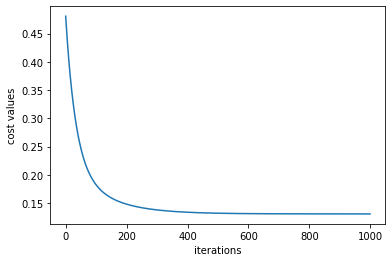

In [15]:
# determining the learning rate alpha
theta = np.zeros((X.shape[1],1))
iterations = 1000
alpha = 0.01
theta, cost_arr = batchGradientDescent(X, y, theta, alpha, iterations)

plt.plot(np.arange(iterations), cost_arr)
plt.xlabel('iterations')
plt.ylabel('cost values')

In [16]:
cost = computecost(X, y, theta)
print(cost)

0.1307033696077189


In [17]:
print(theta)

[[-1.10703409e-16]
 [ 8.78503652e-01]
 [-4.69166570e-02]]


In [18]:
print('enter the size of the house in square feet')
m = int(input())
print('enter number of bedrooms')
n = int(input()) 
m = (m - actual_df['size'].mean()) / actual_df['size'].std()
n = (n - actual_df['bedroom'].mean()) / actual_df['bedroom'].std()
pred_val = np.dot([1, m, n], theta)
val = (pred_val * actual_df['price'].std()) + actual_df['price'].mean() # Feature Normalization
print(val)

enter the size of the house in square feet
1650
enter number of bedrooms
3
[293251.85751776]
